In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

> # Using SeamlessM4T-v1 & V2 (Text2Speech)

### This Notebook is about inspection of 3 models such as :

##### 1. Multimodal (Seamlessm4T) Use case : Text2Speech
##### 2. Large Language Model  Use case : Text Generation
##### 3. Multimodal (Llava1.5-7B) : Image2Text

In [2]:
!nvidia-smi

Fri Dec 15 06:33:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install numpy --pre torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu118
!pip install sentencepiece
!pip install -i https://test.pypi.org/simple/ bitsandbytes
!pip install accelerate
    

Looking in indexes: https://download.pytorch.org/whl/nightly/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.7/809.7 MB 684.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 87.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 54.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 67.7 MB/s et

In [5]:
#VERSION 1 MODEL
from transformers import SeamlessM4TModel
model_v1= SeamlessM4TModel.from_pretrained("facebook/hf-seamless-m4t-medium",device_map='auto')
# model = SeamlessM4TModel.from_pretrained("/content/drive/MyDrive/NLP/text2speech/Seamlessm4t/seamlessm4t-medium")

In [6]:
#VERSION 2 MODEL
from transformers import SeamlessM4Tv2ForTextToSpeech
model_v2 = SeamlessM4Tv2ForTextToSpeech.from_pretrained("facebook/seamless-m4t-v2-large",device_map='auto')

config.json:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/211k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.24G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/9.91M [00:00<?, ?B/s]

In [ ]:
#SAVE THE PRETRAINED MODEL
model.save_pretrained("/kaggle/working/")


In [10]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model_v1.to(device)

In [11]:
print(device)

cuda:0


In [12]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("facebook/hf-seamless-m4t-medium",device_map='auto')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


preprocessor_config.json:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.29k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [14]:
processor.save_pretrained( "/kaggle/working/")

In [13]:
text1="""This article has garnered numerous comments, consistently \
leaning towards the negative. These comments are from individuals who either failed \
to comprehend the content or were expecting another article featuring a “Get Rich Quick” \
strategy, which is not the focus of this piece. If your intention is not to carefully read \
the article and understand its implications, please refrain from proceeding further."""

text2="Hello, This is Samuel, Working in Kaggle. Here we are all there to interview you man!!"
text_inputs = processor(text = text1, src_lang="eng", return_tensors="pt").to(device)

In [14]:
audio_array_from_text = model.generate(**text_inputs, tgt_lang="eng")[0].cpu().numpy().squeeze()
# audio_array_from_audio = model.generate(**audio_inputs, tgt_lang="rus")[0].cpu().numpy().squeeze()

In [15]:
audio_array_from_text

array([ 3.9992621e-05,  1.3984623e-05, -1.6219798e-05, ...,
        1.7938553e-05,  7.2787749e-05,  1.3122510e-04], dtype=float32)

In [16]:
#This is in Russia
from IPython.display import Audio

sample_rate = model.config.sampling_rate
Audio(audio_array_from_text, rate=sample_rate)

#### Using model_v2 

In [21]:
audio_array_from_text = model_v2.generate(**text_inputs, return_intermediate_token_ids=True, 
                                       tgt_lang="eng",
                                       speaker_id=1)[0].cpu().numpy().squeeze()
# audio_array_from_audio = model.generate(**audio_inputs, tgt_lang="rus")[0].cpu().numpy().squeeze()

In [22]:
audio_array_from_text

array([-0.00071706, -0.0007381 , -0.00063153, ...,  0.00113016,
        0.00091658,  0.00101035], dtype=float32)

In [23]:
#This is in Russia
from IPython.display import Audio
from pprint import pprint
pprint(text1)
sample_rate = model.config.sampling_rate
Audio(audio_array_from_text, rate=sample_rate)

('This article has garnered numerous comments, consistently leaning towards '
 'the negative. These comments are from individuals who either failed to '
 'comprehend the content or were expecting another article featuring a “Get '
 'Rich Quick” strategy, which is not the focus of this piece. If your '
 'intention is not to carefully read the article and understand its '
 'implications, please refrain from proceeding further.')


> # **Testing "Zephyr-7B-β" model for text generation**

In [ ]:
# Install transformers from source - only needed for versions <= v4.34
# pip install git+https://github.com/huggingface/transformers.git
# pip install accelerate

import time
%%time
import torch
from transformers import pipeline

pipe = pipeline("text-generation", model="HuggingFaceH4/zephyr-7b-beta", torch_dtype=torch.bfloat16, device_map="auto")

# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
messages = [
    {
        "role": "system",
        "content": "You are a friendly chatbot who always responds in the style of a pirate",
    },
    {"role": "user", "content": "How many helicopters can a human eat in one sitting?"},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])
# <|system|>
# You are a friendly chatbot who always responds in the style of a pirate.</s>
# <|user|>
# How many helicopters can a human eat in one sitting?</s>
# <|assistant|>
# Ah, me hearty matey! But yer question be a puzzler! A human cannot eat a helicopter in one sitting, as helicopters are not edible. They be made of metal, plastic, and other materials, not food!


In [ ]:
print(outputs[0]["generated_text"])

In [ ]:
import time
%%time
context = """
this brief article, I showcase an options trading strategy with a Probability of Profit (PoP) of 100%.\
And this is not really surprising, as you, my esteemed reader, will discover in the following paragraphs.\
This possibility becomes quite obvious when you understand the conditions necessary to achieve such a remarkable outcome.

What is truly important in this article is to showcase another feature of my Python library, OptionLab, which\
brings a lot of flexibility to those studying options trading from a quantitative perspective."""
messages = [
    {
        "role": "system",
        "content": f"""As your task is to extract the answer from the given\
      context which is delimited by triple backticks: ```{context}``` """,
    },
    {"role": "user", "content": "What is the context about?"},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])

In [ ]:
prompt

In [ ]:
import time
%time
context = """
this brief article, I showcase an options trading strategy with a Probability of Profit (PoP) of 100%.\
And this is not really surprising, as you, my esteemed reader, will discover in the following paragraphs.\
This possibility becomes quite obvious when you understand the conditions necessary to achieve such a remarkable outcome.

What is truly important in this article is to showcase another feature of my Python library, OptionLab, which\
brings a lot of flexibility to those studying options trading from a quantitative perspective."""
messages = [
    {
        "role": "system",
        "content": f"""As your task is to extract the answer from the given\
      context which is delimited by triple backticks: ```{context}```. If you can find the answer please mention in \
      the tags <Sorry, Required Answer for the question is not found from the given context>""",
    },
    {"role": "user", "content": "Summarize the about context."},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=1000, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])
%time

**Using Optimum NVidia**

In [ ]:
# from optimum.nvidia.pipelines import pipeline
#docker pull huggingface/optimum-nvidia

In [ ]:

import time
%time
context = """
This brief article, I showcase an options trading strategy with a Probability of Profit (PoP) of 100%.\
And this is not really surprising, as you, my esteemed reader, will discover in the following paragraphs.\
This possibility becomes quite obvious when you understand the conditions necessary to achieve such a remarkable outcome.

What is truly important in this article is to showcase another feature of my Python library, OptionLab, which\
brings a lot of flexibility to those studying options trading from a quantitative perspective."""
messages = [
    {
        "role": "system",
        "content": f"""As your task is to extract the answer from the given\
      context which is delimited by triple backticks: ```{context}```. If you can find the answer please mention in \
      the tags <Sorry, Required Answer for the question is not found from the given context>""",
    },
    {"role": "user", "content": "Who is tom in the given context?."},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=1000, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])
%time

In [ ]:
answer = outputs[0]["generated_text"]
answer

In [ ]:
import re
pattern = re.compile(r'Sorry,(\s\w*)*')
obj = pattern.search(answer).span()
answer = answer[obj[0]:obj[1]]

In [ ]:
answer[obj[0]:obj[1]]

In [ ]:
obj

> # USING LLAVA-HF/LLAVA-1.5-7B-HF (Image to Text) Analysis

In [24]:
# #Install the Certain Libraries
# !pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

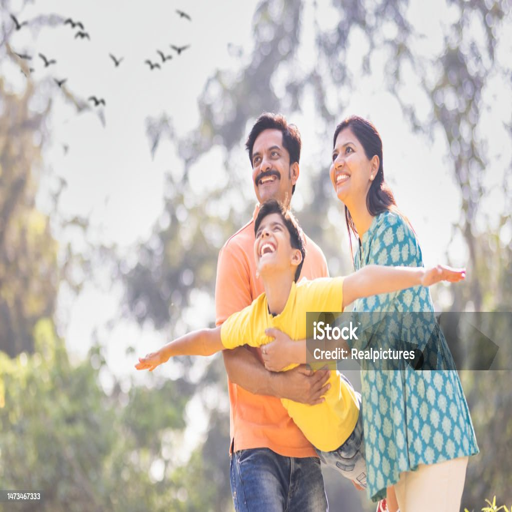

In [30]:
#GETTING A SAMPLE DATA

import requests
from PIL import Image
url = "https://media.istockphoto.com/id/1473467333/photo/cheerful-parents-assisting-son-in-flying-at-park.jpg?s=1024x1024&w=is&k=20&c=o5r2UWXdxr6IoBUlDAXd7F4_5nglPFdU7oSCiSGruyw="

image = Image.open(requests.get(url, stream=True).raw)
# im_path = "/content/drive/MyDrive/NLP/img2text/family.jpg"
# image = Image.open(image_path)
image = image.resize((512,512))
image

In [25]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [26]:
print(torch.__version__)

2.3.0.dev20231214+cu118


In [27]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config},device_map='auto')

config.json:   0%|          | 0.00/922 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA SETUP: CUDA runtime path found: /opt/conda/lib/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 6.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118_nocublaslt.so...


/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/lib/x86_64-linux-gnu'), PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/cuda/lib')}
  warn(msg)
/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: WARNING: Compute capability < 7.5 detected! Only slow 8-bit matmul is supported for your GPU!
  warn(msg)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [ ]:
# from transformers import pipeline
# from PIL import Image    
# import requests

# model_id = "llava-hf/llava-1.5-7b-hf"
# pipe = pipeline("image-to-text", model=model_id,device_map='auto')
# url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"

# image = Image.open(requests.get(url, stream=True).raw)
# prompt = "USER: <image>\nWhat does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud\nASSISTANT:"

# outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
# print(outputs)



**It is important to prompt the model wth a specific format, which is:**
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [31]:
max_new_tokens = 200
prompt = """USER: <image>\nCan you describe about this picture? If there are any persons, describe us more about them such as: \
how many persons, imagine their age, gender\nASSISTANT:"""

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [32]:
full_description=outputs[0]["generated_text"]
from pprint import pprint
assistant_description = full_description.split("?")[1].strip()
pprint(assistant_description)


('If there are any persons, describe us more about them such as: how many '
 'persions, imagine their age, gender\n'
 'ASSISTANT: The image features a family of three, consisting of a man, a '
 'woman, and a young boy. They are all smiling and enjoying their time '
 'together. The man is wearing an orange shirt, and the woman is wearing a '
 'blue shirt. The young boy is in the middle of the scene, and they are all '
 'posing for a picture. The family appears to be happy and close, possibly '
 'spending quality time together.')


In [40]:
def im2txt(image_url):
  from PIL import Image
  import requests
  image = Image.open(requests.get(image_url, stream=True).raw)
  image = image.resize((512,512))
  outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
  result = outputs[0]["generated_text"]
  full_description= result.split("ASSISTANT:")[1].strip()
  return image, full_description

('The image features a family of three, consisting of a man, a woman, and a '
 'young boy. They are all smiling and enjoying their time together. The man is '
 'wearing an orange shirt, and the woman is wearing a blue shirt. The young '
 'boy is in the middle of the scene, and they are all posing for a picture. '
 'The family appears to be happy and close, possibly spending quality time '
 'together.')


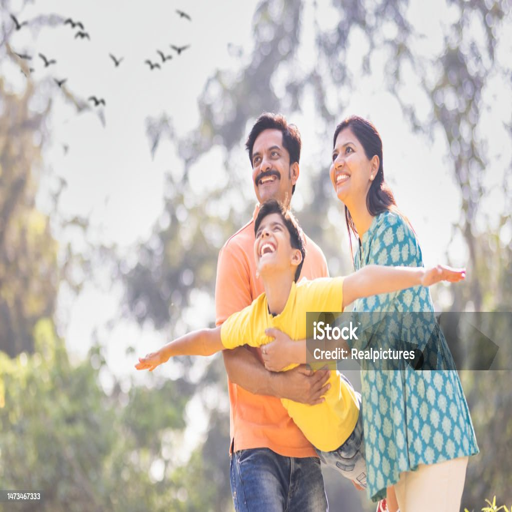

In [58]:
url = "https://media.istockphoto.com/id/1473467333/photo/cheerful-parents-assisting-son-in-flying-at-park.jpg?s=1024x1024&w=is&k=20&c=o5r2UWXdxr6IoBUlDAXd7F4_5nglPFdU7oSCiSGruyw="
Image,caption = im2txt(image_url = url)
pprint(caption)
Image

In [60]:
from IPython.display import Audio
text_inputs = processor(text = caption, src_lang="eng", return_tensors="pt").to(device)
audio_array_from_text = model.generate(**text_inputs, tgt_lang="eng",spkr_id=0)[0].cpu().numpy().squeeze()
sample_rate = model.config.sampling_rate # SeamlessM4T V1 
Audio(audio_array_from_text, rate=sample_rate)

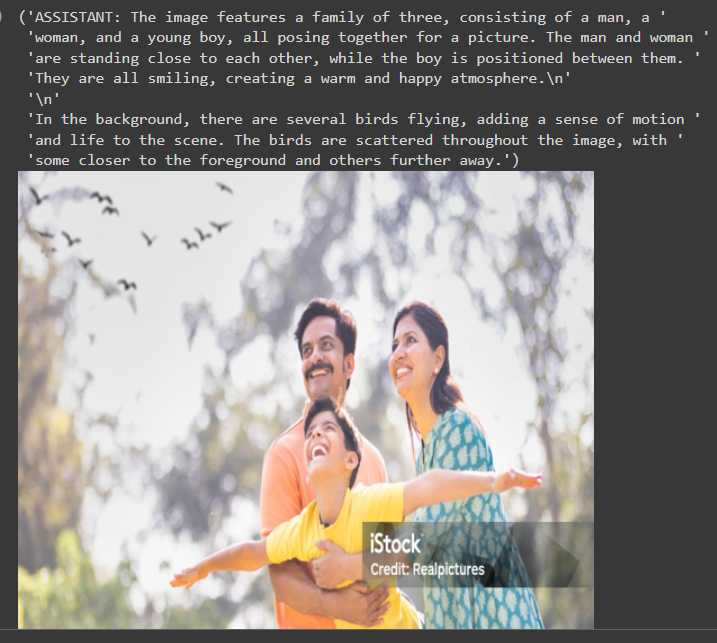

('The image features a man with a black shirt and a tattoo on his arm. He is '
 'standing near a body of water, possibly a lake or a river, with a boat '
 'visible in the background. The man appears to be scratching his head, '
 'possibly indicating confusion or contemplation.\n'
 '\n'
 'There are several other people in the scene, but they are not the main focus '
 'of the image. The presence of multiple people suggests that this location '
 'might be a popular spot for gatherings or outdoor activities.')


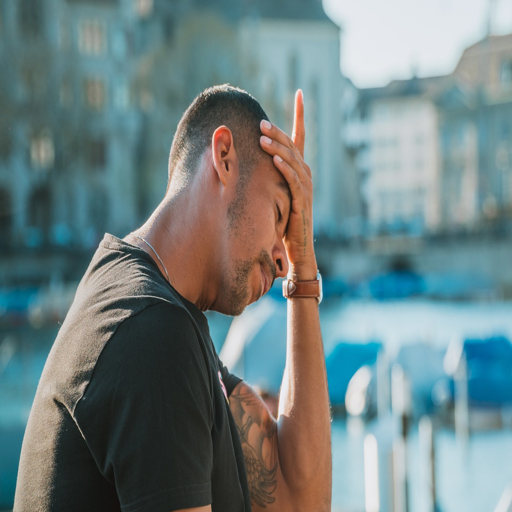

In [42]:
Image,caption = im2txt(image_url = "https://cdn.pixabay.com/photo/2020/04/07/04/17/desperate-5011953_1280.jpg")
pprint(caption)
Image

In [45]:
from IPython.display import Audio
text_inputs = processor(text = caption, src_lang="eng", return_tensors="pt").to(device)
audio_array_from_text = model.generate(**text_inputs, tgt_lang="eng",spkr_id=2)[0].cpu().numpy().squeeze()

sample_rate = model.config.sampling_rate # SeamlessM4T V1 
Audio(audio_array_from_text, rate=sample_rate)

In [3]:
# !pip install pyttsx3

In [2]:
# caption

In [1]:
# import pyttsx3
# engine = pyttsx3.init()
# engine.say("I will speak this text")
# engine.runAndWait()